# Analyze 2020 Election Data

by Yundi Wang

2020 US Election just finished. People can find many different angencies predicting the results online with data. Now as we already known the result, we could go back to analyze those predicting data to see if they are reasonable.

In [22]:
import pandas as pd
import numpy as np
import math as math
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from IPython.display import Markdown as md

scenario = pd.read_csv("presidential_scenario_analysis_2020.csv", sep=',')
scenario.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,scenario_id,probability,scenario_description,timestamp,simulations
0,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,9,0.95445,Biden majority (at least 50 percent of the vote),00:00:48 3 Nov 2020,40000
1,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,8,0.01415,Trump majority (at least 50 percent of the vote),00:00:48 3 Nov 2020,40000
2,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,6,0.08060,Biden wins popular vote but loses Electoral Co...,00:00:48 3 Nov 2020,40000
3,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,5,0.00015,Trump wins popular vote but loses Electoral Co...,00:00:48 3 Nov 2020,40000
4,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,4,0.97430,Biden wins popular vote,00:00:48 3 Nov 2020,40000


In [23]:
scenario = scenario.drop(labels='candidate_3rd', axis=1)
scenario = scenario.drop(labels='simulations', axis=1)
scenario.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,scenario_id,probability,scenario_description,timestamp
0,2020,President,polls-plus,11/3/2020,Trump,Biden,9,0.95445,Biden majority (at least 50 percent of the vote),00:00:48 3 Nov 2020
1,2020,President,polls-plus,11/3/2020,Trump,Biden,8,0.01415,Trump majority (at least 50 percent of the vote),00:00:48 3 Nov 2020
2,2020,President,polls-plus,11/3/2020,Trump,Biden,6,0.08060,Biden wins popular vote but loses Electoral Co...,00:00:48 3 Nov 2020
3,2020,President,polls-plus,11/3/2020,Trump,Biden,5,0.00015,Trump wins popular vote but loses Electoral Co...,00:00:48 3 Nov 2020
4,2020,President,polls-plus,11/3/2020,Trump,Biden,4,0.97430,Biden wins popular vote,00:00:48 3 Nov 2020


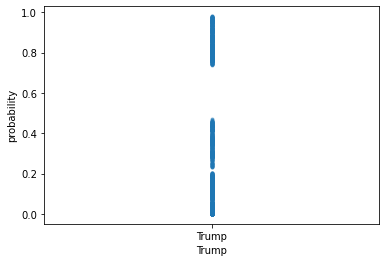

In [24]:
x = scenario['candidate_inc']
y = scenario['probability']

plt.figure()
plt.scatter(x, y, marker='.', alpha=0.5) 
yMin = plt.ylim()[0]
yMax = plt.ylim()[1]
xMin = plt.xlim()[0]
xMax = plt.xlim()[1]
plt.title("")
plt.xlabel("Trump")
plt.ylabel("probability")
plt.show()

In [12]:
national = pd.read_csv("presidential_national_toplines_2020.csv", sep=',')
national.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,ecwin_inc,ecwin_chal,ecwin_3rd,...,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,national_voteshare_3rd_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,0.103900,0.891600,NaN,...,1.842986,42.91262,50.87952,NaN,0.724433,157972048.0,168424640.0,147487920.0,00:00:48 3 Nov 2020,40000
1,2020,President,polls-plus,11/2/2020,Trump,Biden,NaN,0.102675,0.893200,NaN,...,1.842986,42.91348,50.88025,NaN,0.724433,157972048.0,168424640.0,147487920.0,23:45:03 2 Nov 2020,40000
2,2020,President,polls-plus,11/1/2020,Trump,Biden,NaN,0.102850,0.892825,NaN,...,1.823490,43.03094,50.77527,NaN,0.689592,157737856.0,168190448.0,147253728.0,23:11:03 1 Nov 2020,40000
3,2020,President,polls-plus,10/31/2020,Trump,Biden,NaN,0.105625,0.888300,NaN,...,1.835479,42.98096,50.74764,NaN,0.689802,158044784.0,168497376.0,147560672.0,22:23:03 31 Oct 2020,40000
4,2020,President,polls-plus,10/30/2020,Trump,Biden,NaN,0.099625,0.895800,NaN,...,1.847821,42.92510,50.72821,NaN,0.692837,156723120.0,167175712.0,146239008.0,21:34:03 30 Oct 2020,40000


In [13]:
state = pd.read_csv("presidential_state_toplines_2020.csv", sep=',')
state.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,state,tipping,vpi,...,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,state_turnout,state_turnout_hi,state_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,Wyoming,0.000000,0.000000,...,24.50582,0.104044,0.984615,0.999759,0.001795,274642.0,319577.0,231459.0,00:00:48 3 Nov 2020,40000
1,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,Wisconsin,0.053137,2.543351,...,-14.89797,0.771821,0.931934,0.419153,0.986261,3325739.0,3748885.0,2908762.0,00:00:48 3 Nov 2020,40000
2,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,West Virginia,0.000063,0.015240,...,18.01854,0.104550,0.986063,0.999038,0.007935,749616.0,868161.0,635685.0,00:00:48 3 Nov 2020,40000
3,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,Washington,0.002288,0.082997,...,-34.12025,0.263314,0.892971,0.021415,0.993074,4429891.0,5013615.0,3857496.0,00:00:48 3 Nov 2020,40000
4,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,Virginia,0.009850,0.341279,...,-18.56248,0.767263,0.898129,0.072185,0.997476,4599938.0,5189515.0,4020238.0,00:00:48 3 Nov 2020,40000


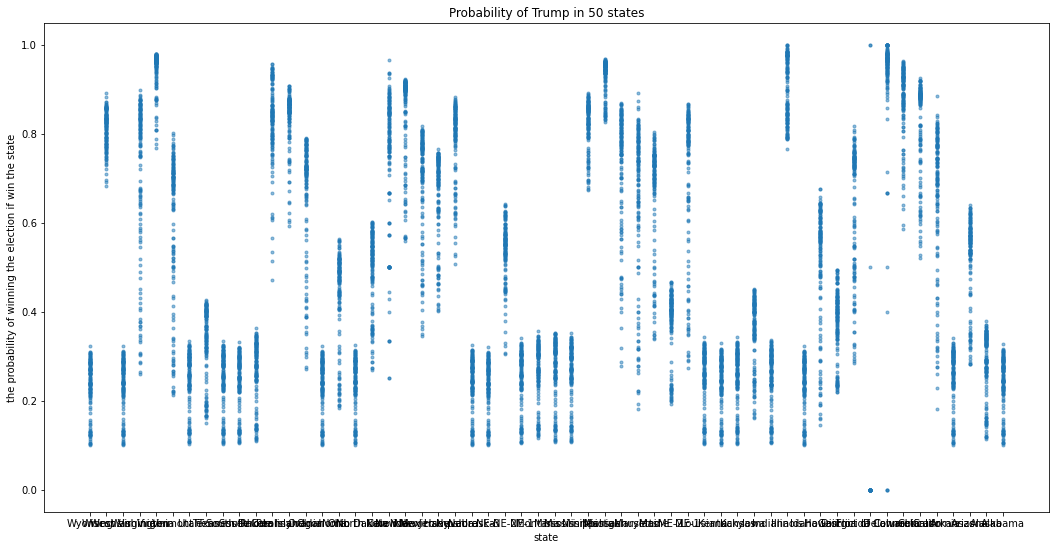

In [33]:
x = state['state']
y = state['win_EC_if_win_state_inc']

plt.figure(figsize=(18,9))
plt.scatter(x, y, marker='.', alpha=0.5) 
yMin = plt.ylim()[0]
yMax = plt.ylim()[1]
xMin = plt.xlim()[0]
xMax = plt.xlim()[1]
plt.title("Probability of Trump in 50 states")
plt.xlabel("state")
plt.ylabel("the probability of winning the election if win the state")
plt.show()

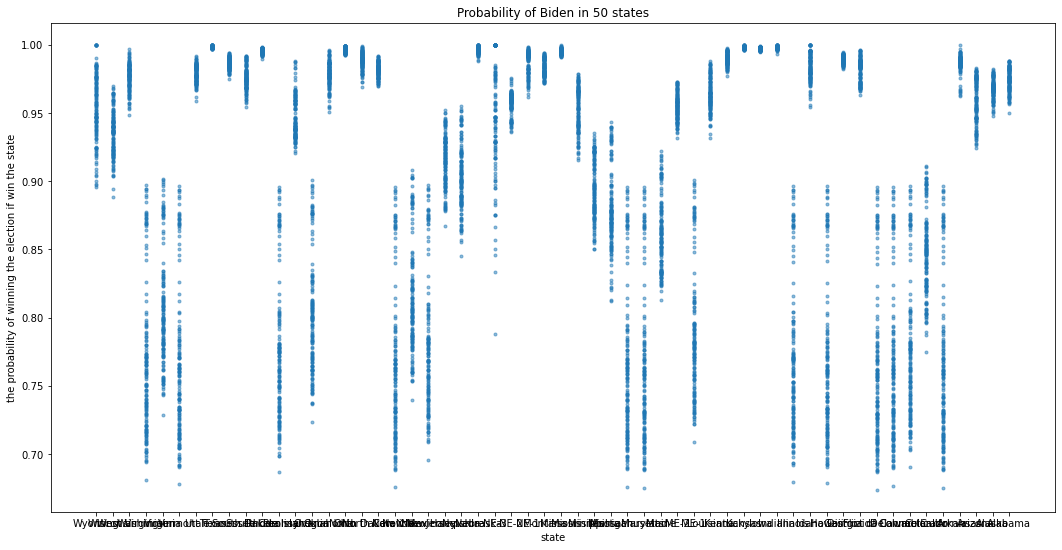

In [34]:
x = state['state']
y = state['win_EC_if_win_state_chal']

plt.figure(figsize=(18,9))
plt.scatter(x, y, marker='.', alpha=0.5) 
yMin = plt.ylim()[0]
yMax = plt.ylim()[1]
xMin = plt.xlim()[0]
xMax = plt.xlim()[1]
plt.title("Probability of Biden in 50 states")
plt.xlabel("state")
plt.ylabel("the probability of winning the election if win the state")
plt.show()

From the two graphs above, we can clearly see the probability of winning each state for Trump and Biden so they could win the election.